# Techniques of High Performance Computing - Assignment 2

### Name: John Duffy

### Student Number: 19154676

# IMPORTANT NOTE


In [565]:
# Import libraries common to Questions 1 & 2.

import numpy as np
import pyopencl as cl

from scipy.sparse import csr_matrix, eye
from scipy.sparse.linalg import LinearOperator, cg

# Question 1

## OpenCL CSR Matrix-Vector Product

**IMPORTANT NOTE**

My MacBook Pro is equipped with an Intel Core i5 CPU and an Intel Iris Plus Graphics GPU as depicted below.

    cl.get_platforms()[0].get_devices()

    [<pyopencl.Device 'Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz' on 'Apple' at 0xffffffff>,
     <pyopencl.Device 'Intel(R) Iris(TM) Plus Graphics 655' on 'Apple' at 0x1024500>]
     
To ensure a context is created using the CPU for Question 1 (so that AVX2 technology is available) the function cl.Context() is used as below.

    ctx = cl.Context(dev_type = cl.device_type.CPU)  # Tell OpenCL to use the CPU device.
    
The function cl.get_some_context() used in the course lecture notes is not specific enough (on my MacBook Pro at least) which then causes kernel build problems. This seems to be specific to macOS 10.14 Mojave.

### Program Description

This program...


### Optimisation Results

A class LinearOperatorBaseline was created to use as a baseline for measuring the performance gains through subsequnt use of OpenCL and AVX2.

In [566]:
# Define the class LinearOperatorBaseline for baseline performance measurements.

class LinearOperatorBaseline(LinearOperator):
    """
    This class... 
    """
    
    def __init__(self, data, indices, indptr):
        """
        """
        self.data = data
        self.indices = indices
        self.indptr = indptr
        self.shape = (len(indptr) - 1, len(indptr) - 1)  # Assume N x N.
    
    def _matvec(self, x):
        """
        """
        y = np.zeros(x.shape[0], dtype=np.float64)
        
        for i in range(self.shape[1]): 
            y[i] = np.dot(self.data[self.indptr[i]:self.indptr[i + 1]], x[self.indices[self.indptr[i]]:self.indptr[i + 1]])
            
        return y

In [567]:
# Create a test instance of LinearOperatorBaseline.

N = 1000

csr = eye((N), dtype=np.float64).tocsr()

linear_operator = LinearOperatorBaseline(csr.data, csr.indices, csr.indptr)

v = np.full((N), 5, dtype=np.float64)

In [568]:
#%%timeit

#linear_operator.matvec(v)

In [569]:
#%%timeit

#linear_operator * v

In [570]:
linear_operator.matvec(v)

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

In [571]:
linear_operator * v

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

In [572]:
# Define the class LinearOperatorOpenCL.

class LinearOperatorOpenCL(LinearOperator):
    """
    This class... 
    
    
    Note: This class assumes the CSR matrix is N x N and derives N from the length of indptr parameter.   
    """
    
    def __init__(self, data, indices, indptr):
        """
        This function...
        """
        
        self.shape = (len(indptr) - 1, len(indptr) - 1)
        
        self.ctx = cl.Context(dev_type = cl.device_type.CPU)
        
        self.queue = cl.CommandQueue(self.ctx, properties=cl.command_queue_properties.PROFILING_ENABLE)
        
        mf = cl.mem_flags
        
        # Copy the CSR matrix data to the device.
 
        self.device_global_data = cl.Buffer(self.ctx, mf.READ_ONLY | mf.COPY_HOST_PTR, hostbuf = data)
        self.device_global_indices = cl.Buffer(self.ctx, mf.READ_ONLY | mf.COPY_HOST_PTR, hostbuf = indices)       
        self.device_global_indptr = cl.Buffer(self.ctx, mf.READ_ONLY | mf.COPY_HOST_PTR, hostbuf = indptr)

        # Reserve space on the device for the input and output vectors.
        
        self.device_global_v = cl.Buffer(self.ctx, mf.READ_ONLY, size=self.shape[0] * np.dtype(np.float64).itemsize)
        self.device_global_y = cl.Buffer(self.ctx, mf.WRITE_ONLY, size=self.shape[0] * np.dtype(np.float64).itemsize)

        self.program = cl.Program(self.ctx, """
        __kernel void matvec_opencl(
            __global const double *data,
            __global const double *indices,
            __global const double *indptr,
            __global const double *v,
            __global double *y
        )
        {
            double8 result[4] = {0.0, 0.0, 0.0, 0.0};
 
            int gid = get_global_id(0);
 
            y[gid] = 10 * v[gid]; 

        }
        """).build()

    
    def _matvec(self, host_v):
        """
        """

        cl.enqueue_copy(self.queue, self.device_global_v, host_v)

        self.program.matvec_opencl(self.queue, \
                                   (self.shape[0],), \
                                   (1,), \
                                   self.device_global_data, \
                                   self.device_global_indices, \
                                   self.device_global_indptr, \
                                   self.device_global_v, \
                                   self.device_global_y \
                                  )

        host_y = np.zeros((self.shape[0]), dtype=np.float64)

        cl.enqueue_copy(self.queue, host_y, self.device_global_y)
        
               
        #for i in range(self.shape[1]): 
        #y[i] = np.dot(self.data[self.indptr[i]:self.indptr[i + 1]], x[self.indices[self.indptr[i]]:self.indptr[i + 1]])
            
        return host_y


In [573]:
# Create a test instance of LinearOperatorOpenCL.

N = 16

csr = eye((N), dtype=np.float64).tocsr()

linear_operator = LinearOperatorOpenCL(csr.data, csr.indices, csr.indptr)

In [574]:
# Test the instance.

v = np.full((N), 33, dtype=np.float64)

linear_operator.matvec(v)

array([330., 330., 330., 330., 330., 330., 330., 330., 330., 330., 330.,
       330., 330., 330., 330., 330.])

In [575]:
#%%timeit

#linear_operator.matvec(v)

In [576]:
#%%timeit

#linear_operator * v

In [577]:
#linear_operator.matvec(v)

In [578]:
#linear_operator * v

# Question 2

## Solving a Poisson Problem with OpenCL

**IMPORTANT NOTE**

My MacBook Pro is equipped with an Intel Core i5 CPU and an Intel Iris Plus Graphics GPU as depicted below.

    cl.get_platforms()[0].get_devices()

    [<pyopencl.Device 'Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz' on 'Apple' at 0xffffffff>,
     <pyopencl.Device 'Intel(R) Iris(TM) Plus Graphics 655' on 'Apple' at 0x1024500>]
     
To ensure a context is created using the GPU for Question 2 the function cl.Context() is used as below.

    ctx = cl.Context(dev_type = cl.device_type.GPU)  # Tell OpenCL to use the GPU device.
    
The function cl.get_some_context() used in the course lecture notes is not specific enough (on my MacBook Pro at least) which then causes kernel build problems. This seems to be specific to macOS 10.14 Mojave.

### Program Description

This program...

In [670]:
# Define the class StencilOperatorOpenCL.

class StencilOperatorOpenCL(LinearOperator):
    """
    This class... 
    """
    
    def __init__(self, m):
        """
        This function...
        """
        
        self.m = m
        
        self.shape = (m * m, m * m)
        
        self.ctx = cl.Context(dev_type = cl.device_type.GPU)
        
        self.queue = cl.CommandQueue(self.ctx, properties=cl.command_queue_properties.PROFILING_ENABLE)
        
        mf = cl.mem_flags
        
        self.device_u = cl.Buffer(self.ctx, mf.READ_ONLY, size = self.shape[0] * np.dtype(np.float32).itemsize)
        self.device_v = cl.Buffer(self.ctx, mf.WRITE_ONLY, size = self.shape[0] * np.dtype(np.float32).itemsize)

        self.program = cl.Program(self.ctx, """
        __kernel void stencil_kernel(
            __global const double *u,
            __global double *v
        )
        {
            //int i = get_global_id(0);
            
            //v[i] = 0.5 * u[i];

            int i = get_global_id(0);
            int j = get_global_id(1);
 
            int m = 32;
 
            if (i == 0 || i == (m - 1) || j == 0 || j == (m - 1)) {
                v[i * m + j] = u[i * m + j];
                return;
            }            
 
            v[i * m + j] = 4 * u[i * m + j] - u[i * m + j - 1] - u[i * m + j + 1] - u[(i - 1) * m + j] - u[(i + 1) * m + j];
            
            //v[i * m + j] = u[i * m + j];
        }
        """).build()

    
    def _matvec(self, u):
        """
        """
        
        self.dtype = u.dtype
        
        cl.enqueue_copy(self.queue, self.device_u, u)

        self.program.stencil_kernel(self.queue, \
                                    (32, 32), \
                                    (1, 1), \
                                    self.device_u, \
                                    self.device_v)

        v = np.zeros((self.shape[0]), dtype=np.float32)

        cl.enqueue_copy(self.queue, v, self.device_v)
            
        return v

In [671]:
# Create an instance of StencilOperatorOpenCL.

M = 32

stencil = StencilOperatorOpenCL(M)

In [672]:
# Test the instance.

u = np.full((M * M), 4, dtype=np.float32)

stencil.matvec(u)

array([4., 4., 4., ..., 4., 4., 4.], dtype=float32)

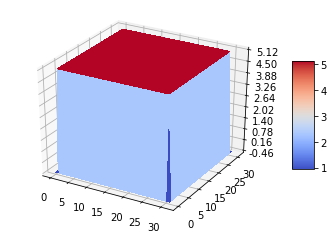

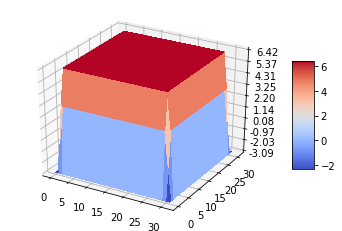

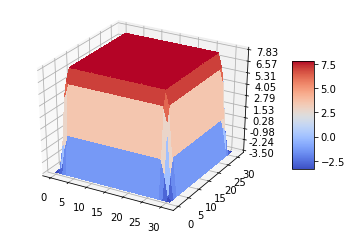

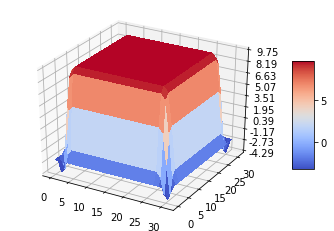

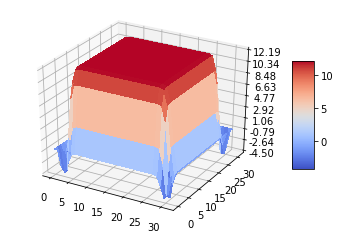

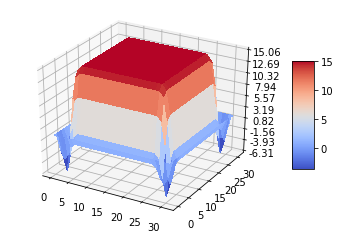

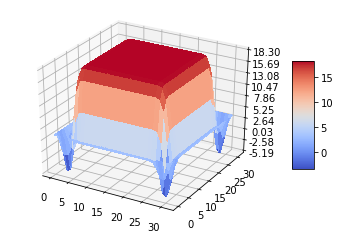

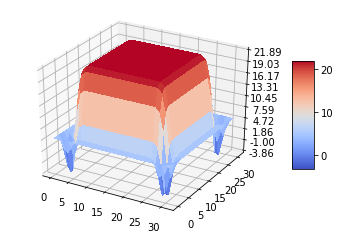

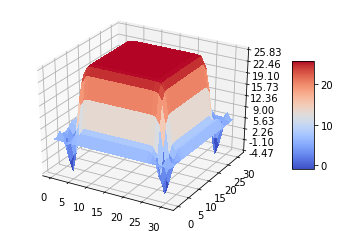

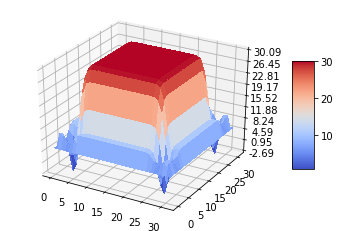

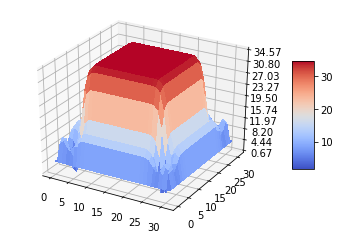

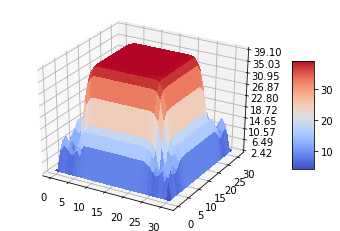

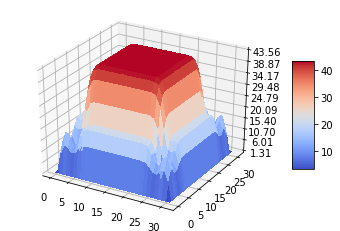

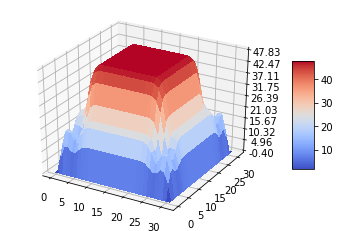

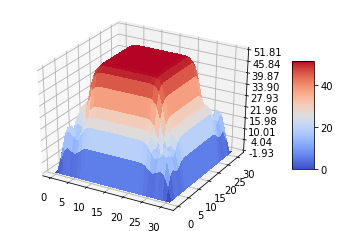

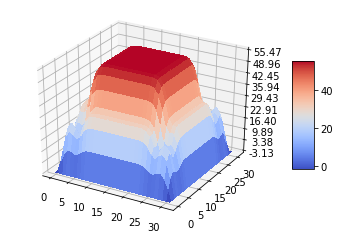

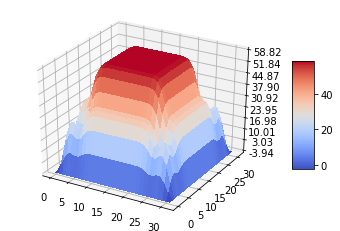

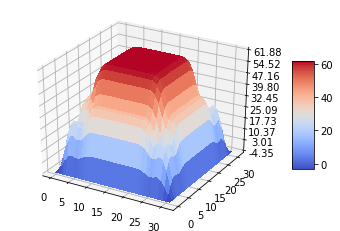

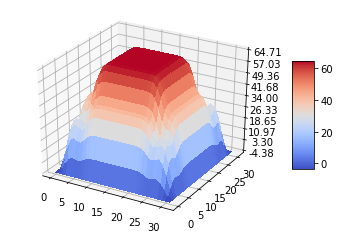

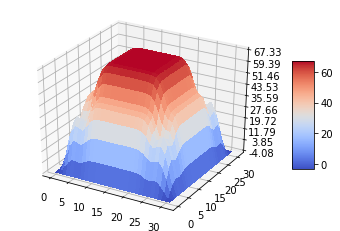

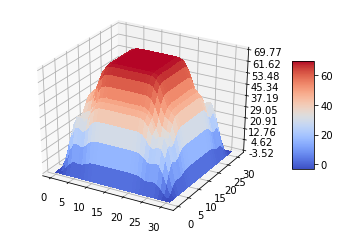

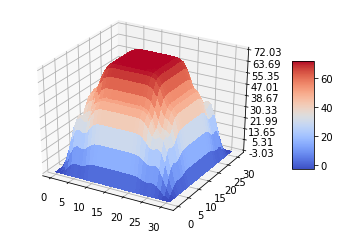

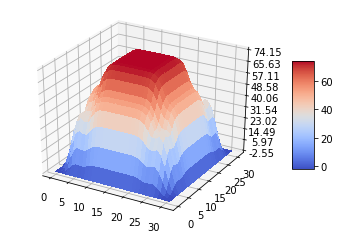

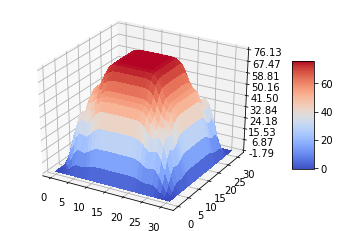

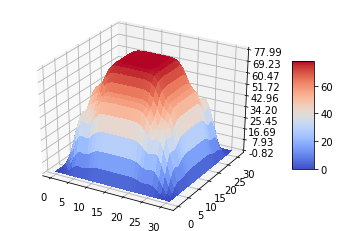

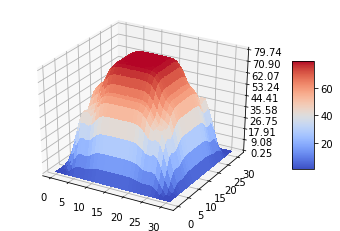

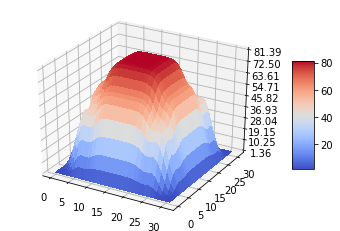

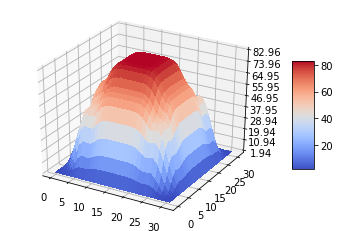

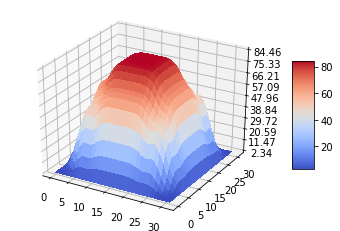

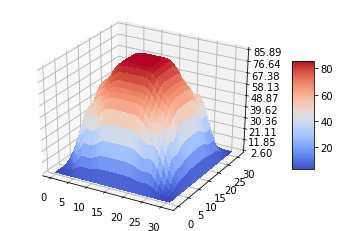

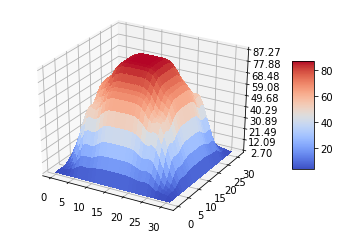

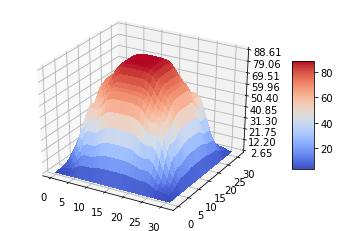

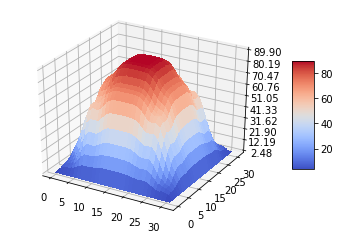

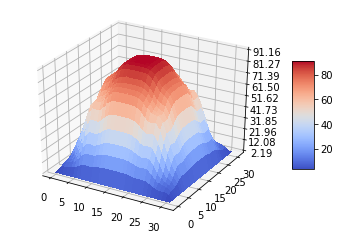

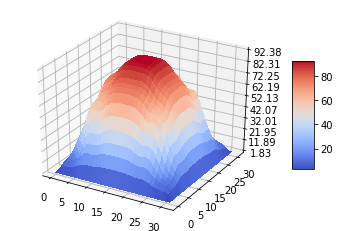

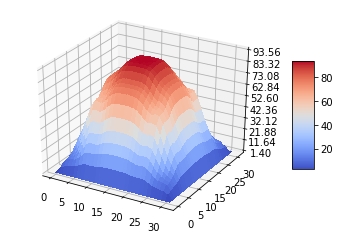

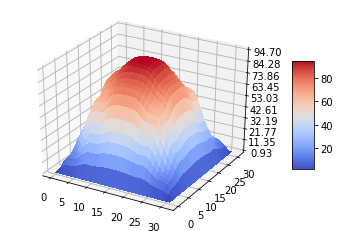

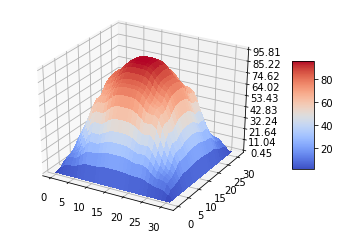

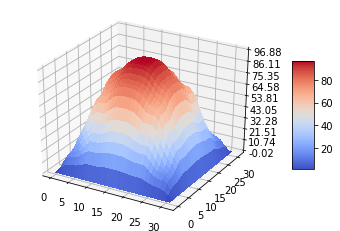

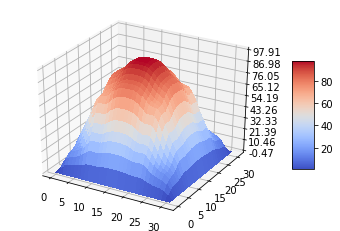

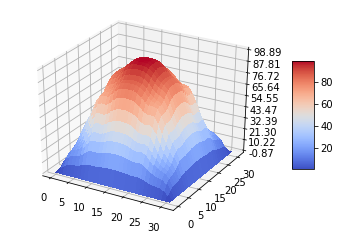

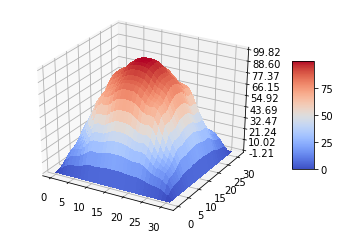

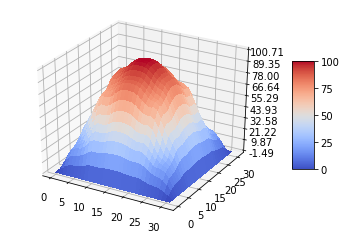

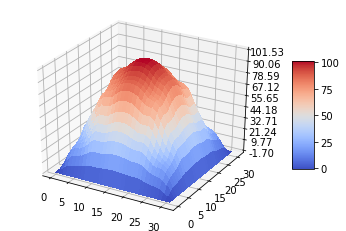

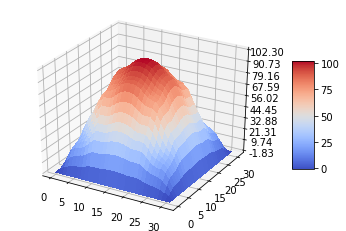

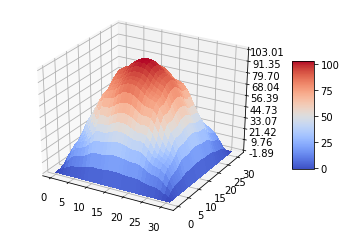

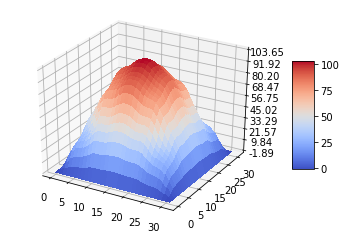

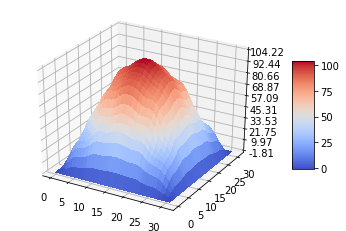

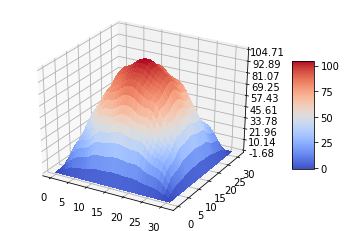

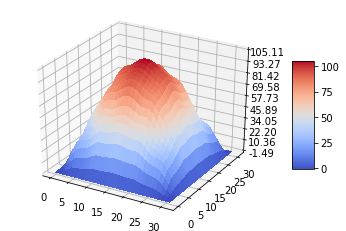

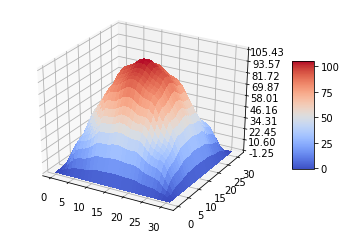

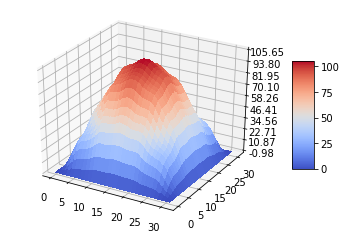

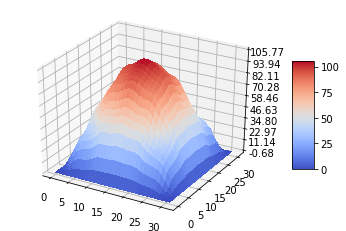

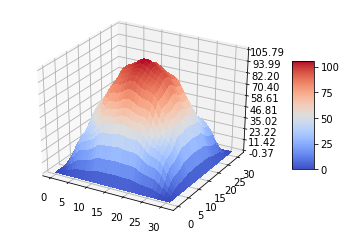

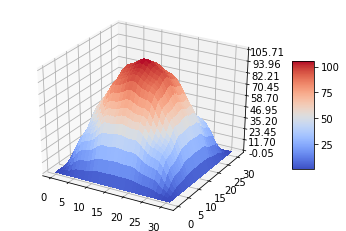

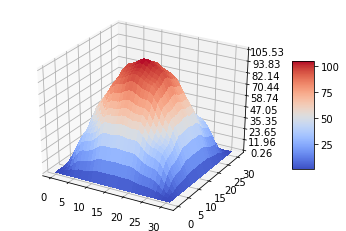

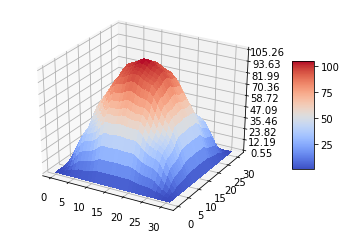

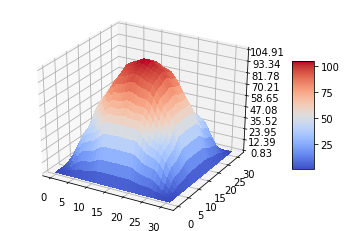

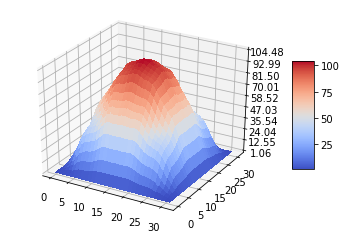

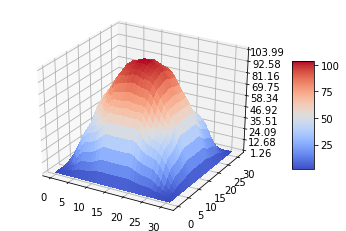

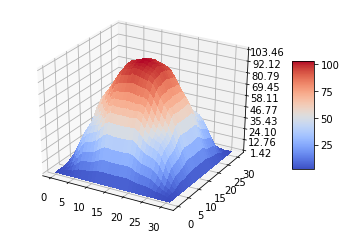

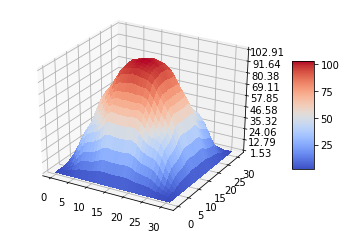

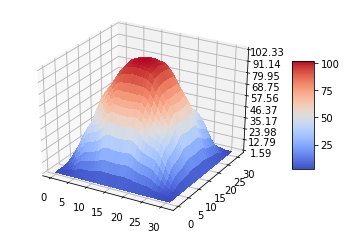

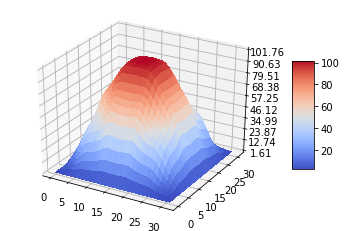

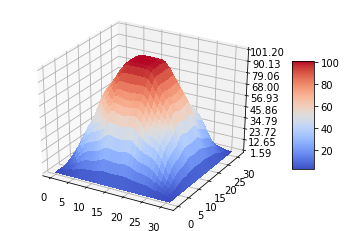

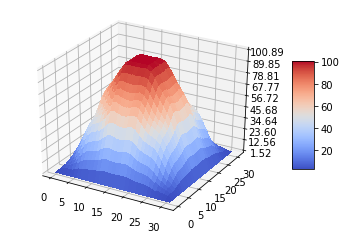

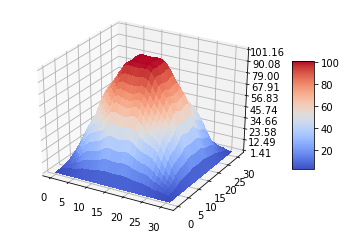

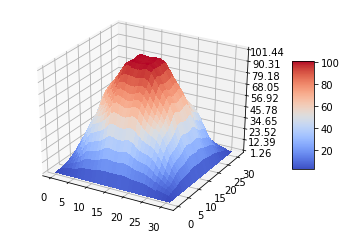

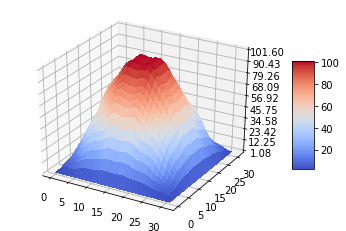

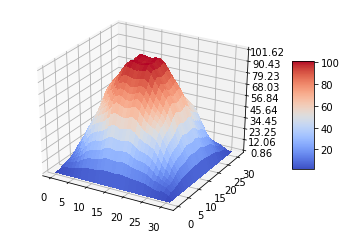

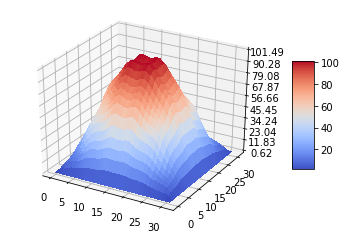

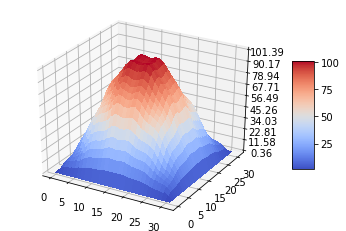

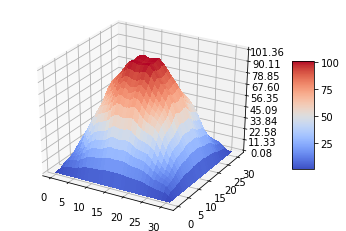

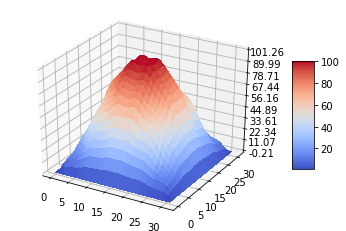

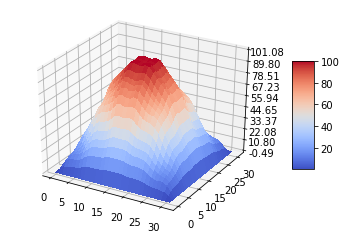

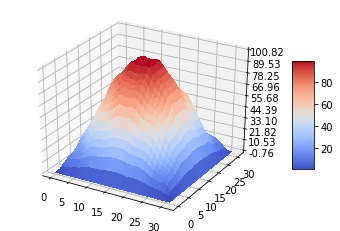

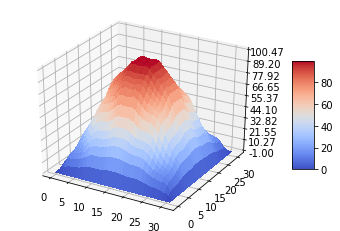

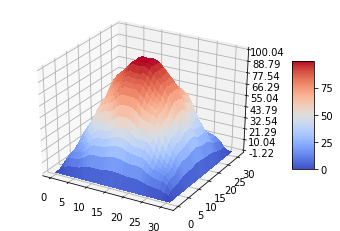

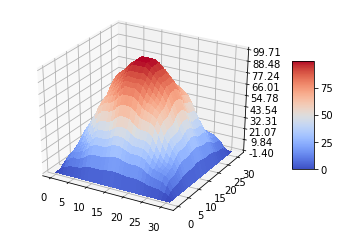

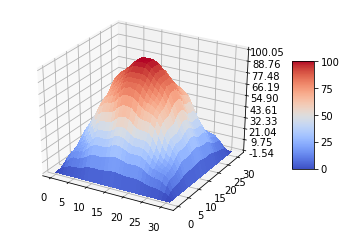

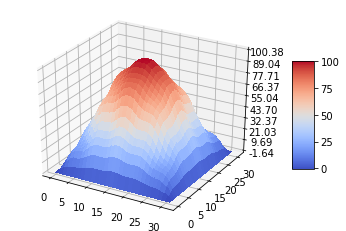

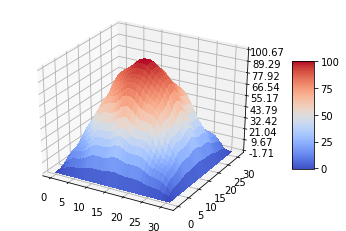

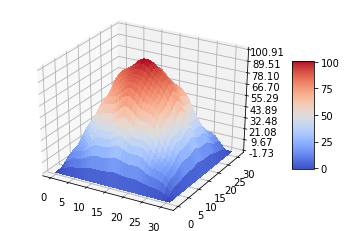

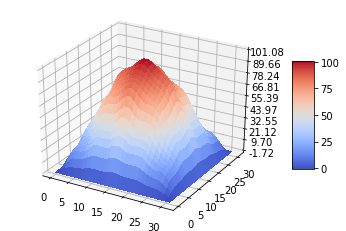

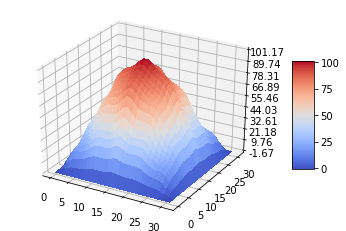

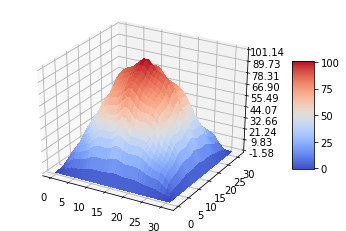

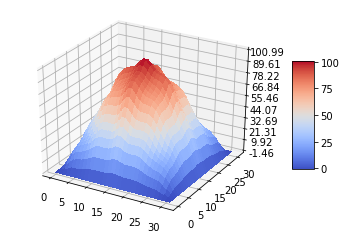

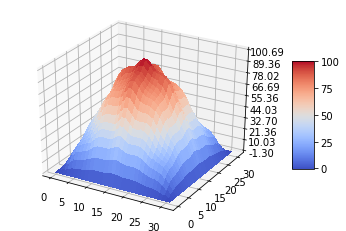

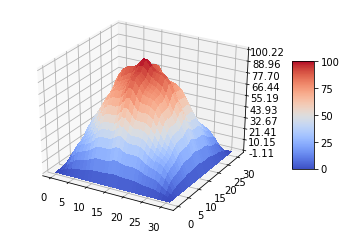

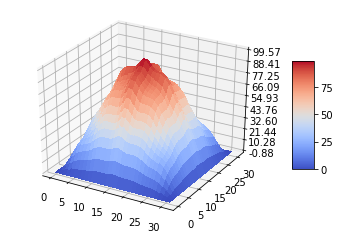

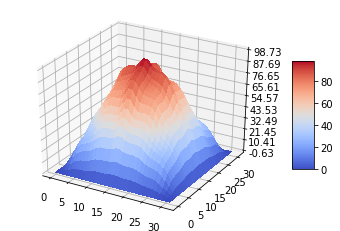

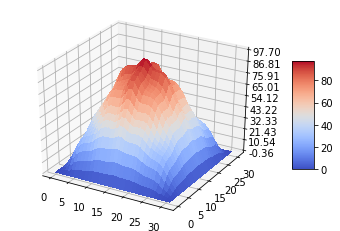

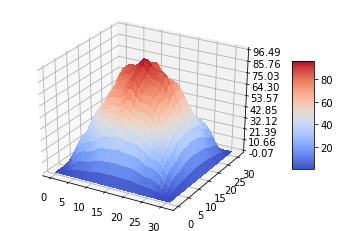

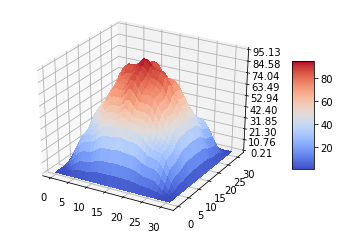

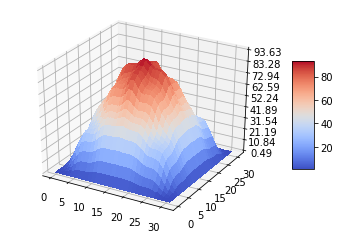

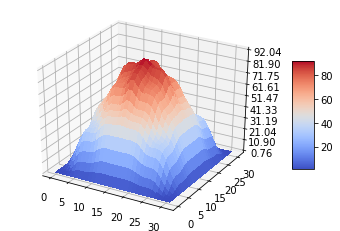

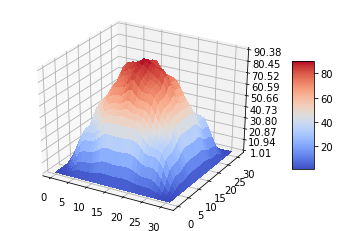

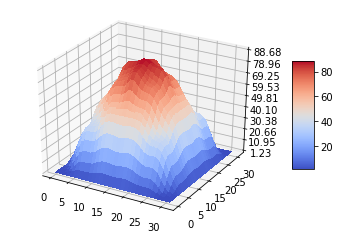

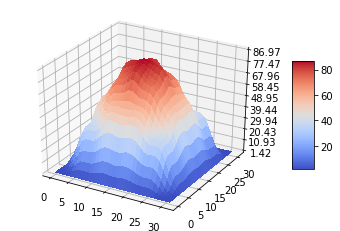

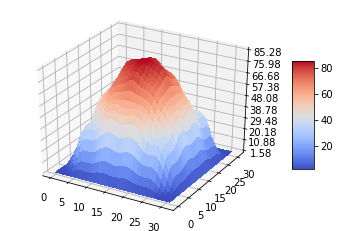

In [675]:
# Use Conjugate Iteration.

M = 32

u = np.full((M * M), 4, dtype=np.float32)

#u = np.array([[0,0,0,0],[0,1,1,0],[0,1,1,0],[0,0,0,0]], dtype=np.float32).flatten()

b = np.ones((M, M), dtype=np.float32)

b[0, :] = 0
b[:, 0] = 0

b[M - 1, :] = 0
b[:, M - 1] = 0

iterations = []

#import matplotlib.pyplot as plt

def cg_callback(xk):
    #plt.imshow(xk.reshape(M, M))
    #plt.show()
    #iterations.append(xk.reshape(M, M))
    
    data = xk.reshape(M, M)

    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X = range(M)
    Y = range(M)
    X, Y = np.meshgrid(X, Y)
    #R = np.sqrt(X**2 + Y**2)
    Z = data[X, Y]

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

    
    
solution, info = cg(StencilOperatorOpenCL(M), b.flatten(), x0 = u, maxiter = 100, callback = cg_callback)

In [643]:
solution.reshape(M, M)

array([[22.348942, 22.348942, 22.348942, ..., 22.348942, 22.348942,
        22.348942],
       [22.348942, 47.42447 , 50.83123 , ..., 50.831234, 47.424477,
        22.348942],
       [22.348942, 50.83123 , 46.811947, ..., 46.81195 , 50.831234,
        22.348942],
       ...,
       [22.348942, 50.831234, 46.811954, ..., 46.811947, 50.831226,
        22.348942],
       [22.348942, 47.424473, 50.831234, ..., 50.83123 , 47.424473,
        22.348942],
       [22.348942, 22.348942, 22.348942, ..., 22.348942, 22.348942,
        22.348942]], dtype=float32)